### Importing Libraries and Loading Datasets

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Function to read stock data from a file
def read_stock_data(stock_ticker):
    # Read a CSV file for the given stock ticker
    return pd.read_csv(f'sp500_tickers_A-D_1min_1pppix/{stock_ticker}_1min.txt')

# Function to preprocess stock data
def preprocess_stock_data(stock_df):
    # Rename columns for clarity
    stock_df.columns = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']
    # Convert the 'Timestamp' column to datetime
    stock_df['Timestamp'] = pd.to_datetime(stock_df['Timestamp'])
    return stock_df

# Function to filter stock data based on time and date criteria
def filter_stock_data(stock_df, start_time, end_time, start_date):
    # Filter the stock data for the closing price
    idt_data = stock_df[(stock_df['Timestamp'].dt.time == end_time)]
    # Get minute-by-minute data between 9:30 a.m. and 4:00 p.m. on the specified start date
    hft_data = stock_df[(stock_df['Timestamp'].dt.date >= start_date) & 
                        (stock_df['Timestamp'].dt.time >= start_time) & 
                        (stock_df['Timestamp'].dt.time <= end_time)]
    
    # Reset the index for the filtered data
    hft_data.reset_index(drop=True, inplace=True)
    return idt_data, hft_data


## Question 1

In [3]:
def plot_daily_closing_price(stock_df, stock_name):
    # Create a figure for daily closing price data
    plt.figure(figsize=(12, 4))
    
    # Plotting daily closing prices
    plt.plot(np.array(stock_df['Timestamp']), np.array(stock_df['Close']), label=stock_name)
    
    # Adding labels and a title to the plot
    plt.xlabel('Timestamp')
    plt.ylabel('Closing Price')
    plt.title(f'Daily Closing Price for {stock_name}')
    
    # Display the plot
    plt.show()

def plot_minute_by_minute_closing_price(stock_df, stock_name, start_date):
    # Filter data for the year of the given start_date
    available_dates_year = stock_df[stock_df['Timestamp'].dt.year == start_date.year]['Timestamp'].dt.date.unique()
    first_date_year = min(available_dates_year)

    # Filter data for the first available date of the given year
    filtered_data = stock_df[(stock_df['Timestamp'].dt.date == first_date_year) & (stock_df['Timestamp'].dt.year == start_date.year)]

    # Create a new figure for minute-by-minute data
    plt.figure(figsize=(12, 4))

    # Plotting minute-by-minute closing price data
    plt.plot(np.array(filtered_data['Timestamp']), np.array(filtered_data['Close']))

    # Adding labels and a title to the plot
    plt.xlabel('Timestamp')
    plt.ylabel('Closing Price')
    plt.title(f'Minute-by-Minute Data for {stock_name} ({first_date_year})')

    # Display the plot
    plt.show()

def create_candlestick_chart(stock_df, stock_name):
    # Select data for the latest date
    end_date = max(stock_df['Timestamp'].dt.date)
    stock_df = stock_df[(stock_df['Timestamp'].dt.date == end_date)]

    # Create a figure for the candlestick chart
    fig = go.Figure()
    fig.add_trace(go.Candlestick(x=stock_df['Timestamp'],
                open=stock_df['Open'],
                high=stock_df['High'],
                low=stock_df['Low'],
                close=stock_df['Close'],
                name=f'Stock {stock_name}'))

    # Add volume bars as a separate trace
    fig.add_trace(go.Bar(x=stock_df['Timestamp'],
                y=stock_df['Volume'],
                yaxis='y2',
                name=f'Volume {stock_name}'))

    # Customize the layout of the candlestick chart
    fig.update_layout(title=f'Candlestick Chart with Volume of {stock_name}',
                      xaxis_title='Time',
                      yaxis_title='Price',
                      xaxis_rangeslider_visible=True,
                      yaxis2=dict(title='Volume', overlaying='y', side='right'))

    # Display the candlestick chart
    fig.show()


In [4]:
# Define a list of stock tickers
stock_str = ['AAPL', 'AINV', 'AMZN']

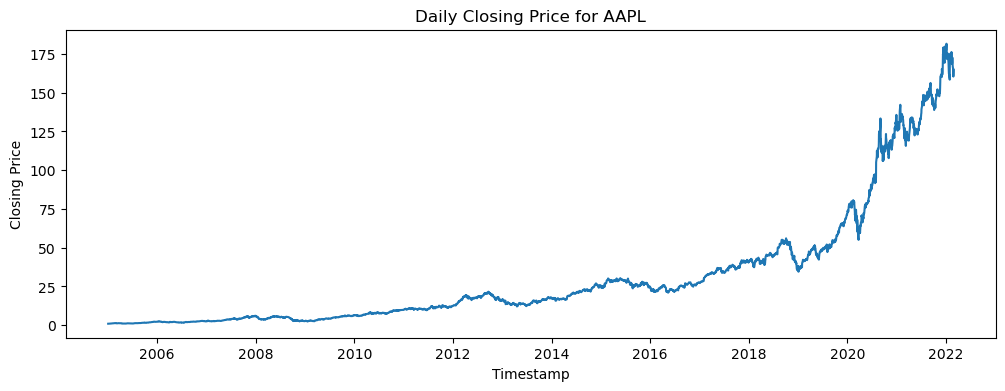

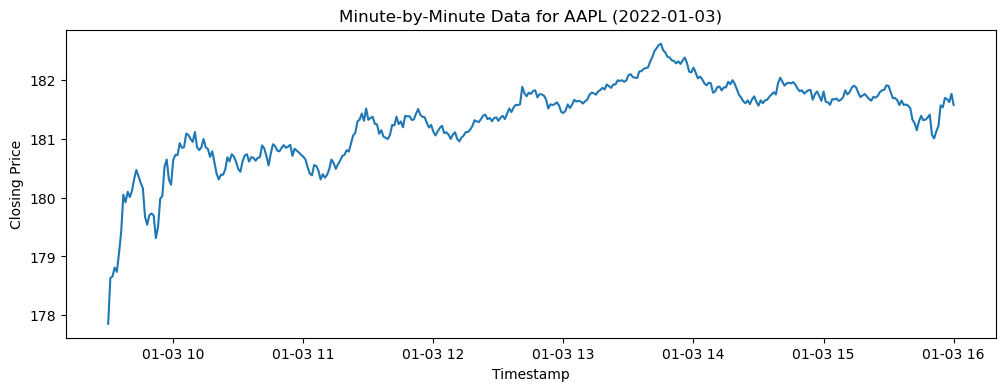

/home/priyansh/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



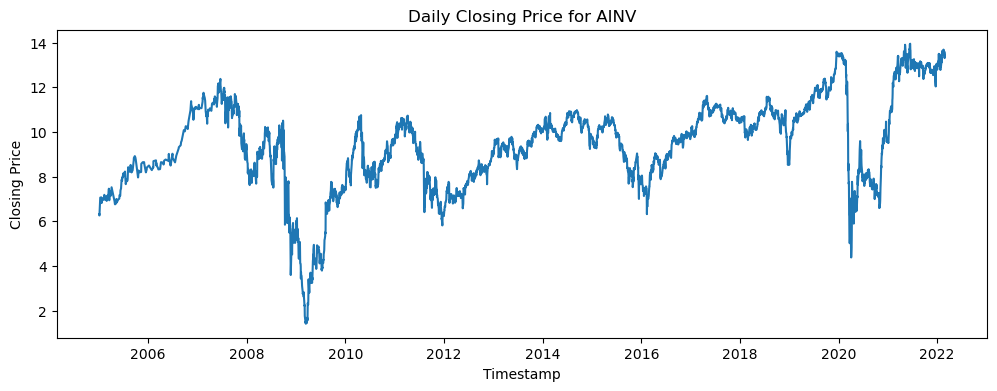

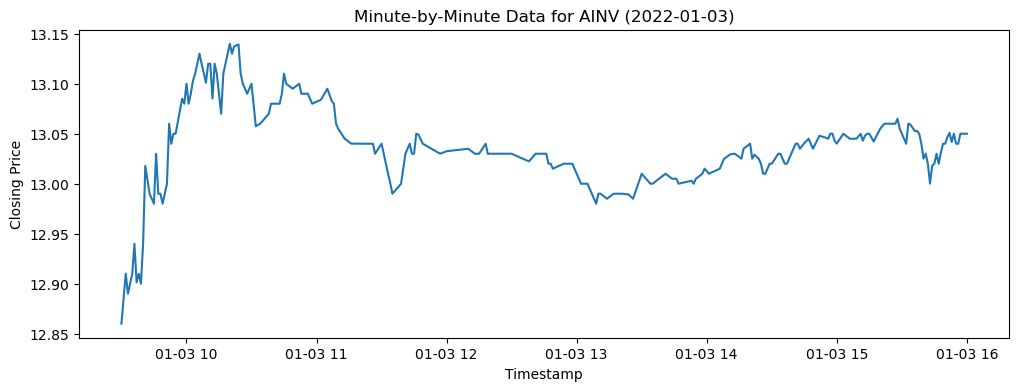

/home/priyansh/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



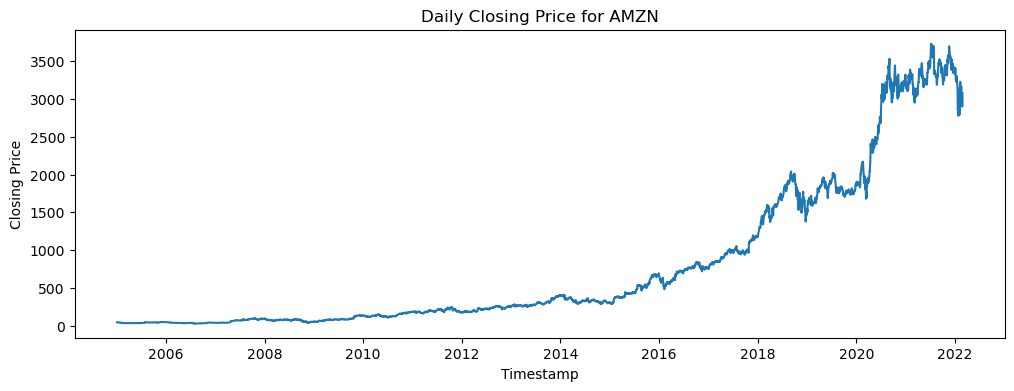

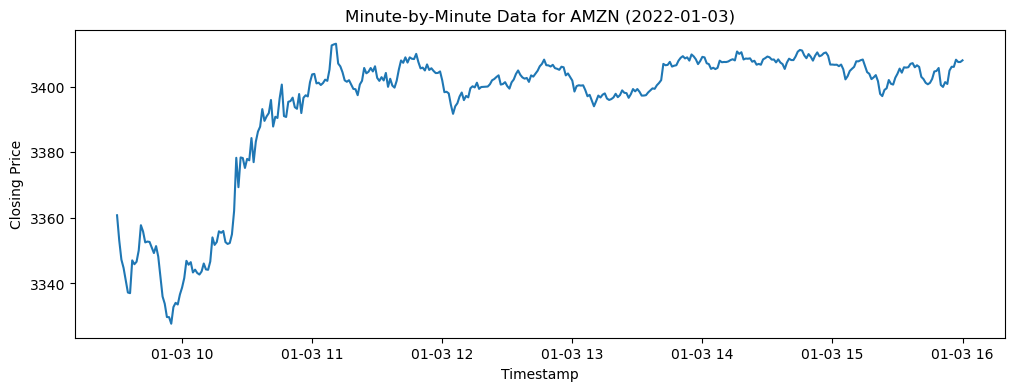

/home/priyansh/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [5]:
# Define start time, end time, and start date
start_time = pd.to_datetime('09:30:00').time()
end_time = pd.to_datetime('16:00:00').time()
start_date = pd.to_datetime('2022').date()
hft_stock_data = []

# Loop through selected stocks
for stock_symbol in stock_str:
    # Read and preprocess stock data
    stock_data = read_stock_data(stock_symbol)
    stock_data = preprocess_stock_data(stock_data)
    
    # Filter data for high-frequency trading
    idt_data, hft_data = filter_stock_data(stock_data, start_time, end_time, start_date)
    
    # Append high-frequency data to the list
    hft_stock_data.append(hft_data)

    # Plot daily closing price
    plot_daily_closing_price(idt_data, stock_symbol)
    
    # Plot minute-by-minute closing price for high-frequency data
    plot_minute_by_minute_closing_price(hft_data, stock_symbol, start_date)
    
    # Create and display candlestick chart for high-frequency data
    create_candlestick_chart(hft_data, stock_symbol)

Given that AAPL has significantly fewer missing values, it stands out as the prime candidate for training the model and subsequently conducting tests. Afterwards, we can assess its performance on various other stocks for high-frequency intraday trading.

### Populating Timestamps and Handling Missing Values
For minute-by-minute data, where variations are minimal, linear interpolation of the most recent available data is a sensible approach. However, this method is effective only when the missing values are infrequent and reasonably spaced apart. Additionally, we must take into account market holidays when the stock market is closed.

In [6]:
def fill_missing(data_frame, start_time, end_time):
    # Generate a list of expected timestamps with minute frequency between start_time and end_time
    expected_timestamps = pd.date_range(
        start=data_frame['Timestamp'].min().replace(hour=start_time.hour, minute=start_time.minute),
        end=data_frame['Timestamp'].max().replace(hour=end_time.hour, minute=end_time.minute),
        freq='T'
    )
    
    # Get unique dates from the 'Timestamp' column to exclude holidays
    expected_dates = data_frame['Timestamp'].dt.date.drop_duplicates()
    
    # Set 'Timestamp' column as the index of the DataFrame
    data_frame.set_index('Timestamp', inplace=True)
    
    # Reindex the DataFrame using the expected timestamps
    data_frame = data_frame.reindex(expected_timestamps)
    
    # Interpolate missing data using time-based interpolation (average of adjacent values)
    data_frame.interpolate(method='time', inplace=True)
    
    # Reset the index of the DataFrame
    data_frame.reset_index(inplace=True)
    
    # Filter data by start_time, end_time, and expected_dates to exclude holidays
    data_frame = data_frame[
        (data_frame['index'].dt.time >= start_time) &
        (data_frame['index'].dt.time <= end_time) &
        (data_frame['index'].dt.date.isin(expected_dates))
    ]
    
    # Reset the index of the DataFrame again
    data_frame.reset_index(drop=True, inplace=True)
    
    return data_frame


In [7]:
# Fill missing data for AAPL and AMZN high-frequency stock data
aapl_hf = fill_missing(hft_stock_data[stock_str.index('AAPL')], start_time=start_time, end_time=end_time)
amzn_hf = fill_missing(hft_stock_data[stock_str.index('AMZN')], start_time=start_time, end_time=end_time)

# Print information about the filled DataFrames
print(aapl_hf.info())
print(amzn_hf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14858 entries, 0 to 14857
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   14858 non-null  datetime64[ns]
 1   Open    14858 non-null  float64       
 2   High    14858 non-null  float64       
 3   Low     14858 non-null  float64       
 4   Close   14858 non-null  float64       
 5   Volume  14858 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 696.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14858 entries, 0 to 14857
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   14858 non-null  datetime64[ns]
 1   Open    14858 non-null  float64       
 2   High    14858 non-null  float64       
 3   Low     14858 non-null  float64       
 4   Close   14858 non-null  float64       
 5   Volume  14858 non-null  float64       
dtypes: dateti

## Question 2

In [8]:
def preprocess_data(data_frame):
    # Drop 'index' column because it's not needed for normalization
    data_frame.drop('index', axis=1, inplace=True)
    return data_frame

def visualize_data(data, title, x_label, y_label):
    plt.figure(figsize=(8, 5))  # Adjust the figure size
    plt.hist(data, bins=50, color='skyblue', edgecolor='black')  # Specify color and edge color
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)  # Add grid lines
    plt.show()

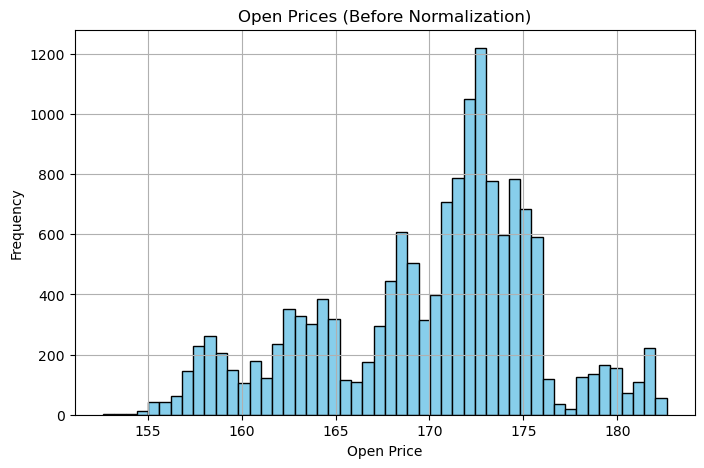

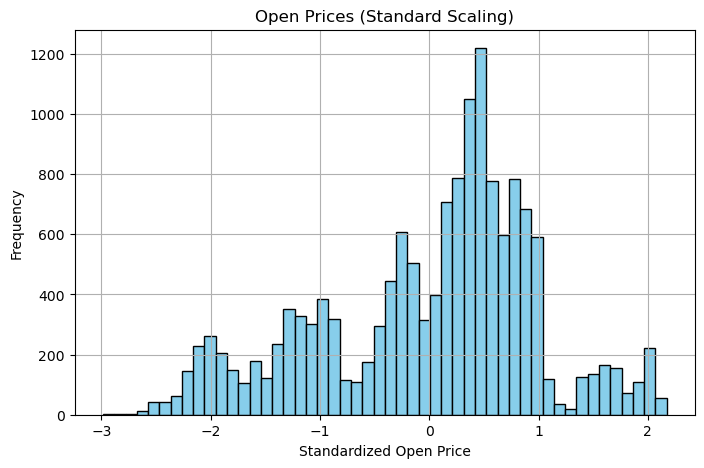

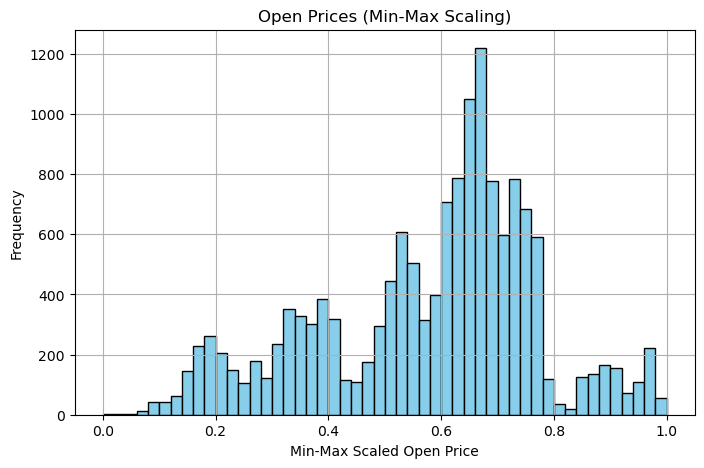

In [9]:
# Preprocess the data
aapl_hf1 = preprocess_data(aapl_hf.copy())

# Visualize open prices before normalization
visualize_data(aapl_hf1['Open'], 'Open Prices (Before Normalization)', 'Open Price', 'Frequency')

'''Normalization'''

# Standard Scaling
scaler_std = StandardScaler()
scaled_data_standard = scaler_std.fit_transform(aapl_hf1)
scaled_data_standard = pd.DataFrame(scaled_data_standard)

# Visualize open prices after standard scaling
visualize_data(
    scaled_data_standard[0], 'Open Prices (Standard Scaling)',
    'Standardized Open Price', 'Frequency'
)

# Min-Max Scaling
scaler_min_max = MinMaxScaler(feature_range=(0, 1))
scaled_data_min_max = scaler_min_max.fit_transform(aapl_hf1)
scaled_data_min_max = pd.DataFrame(scaled_data_min_max)

# Visualize open prices after min-max scaling
visualize_data(
    scaled_data_min_max[0], 'Open Prices (Min-Max Scaling)',
    'Min-Max Scaled Open Price', 'Frequency'
)


Because min-max scaling transforms the data into the [0,1] range, avoiding negative values, it is our preferred choice over standard scaling, which can yield negative ranges.

## Question 4

In [10]:
class CustomLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(CustomLSTMModel, self).__init__()
        
        # Define the dimensions and layers
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # LSTM model with batch_first=True
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True) 

        # Fully connected layer for output
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize the hidden and cell state tensors with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Forward pass through the LSTM layer
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Select the output of the last time step and pass it through the fully connected layer
        out = self.fc(out[:, -1, :]) 

        return out

## Question 5

In [11]:
import numpy as np
import torch

def data_loader(stock_data, look_back, percentage_train_split):
    '''
    Input: 
        - stock_data (DataFrame): The stock data as a DataFrame.
        - look_back (int): The number of data points to look back to predict the next one.
        - percentage_train_split (float): The percentage to split for training and testing.
    Output: 
        - [x_train, y_train, x_test, y_test] all tensors.
    '''

    # Convert the DataFrame to a NumPy array
    data_array = stock_data.values
    sequences = []

    # Create input sequences of length 'look_back'
    for i in range(stock_data.shape[0] - look_back):
        sequences.append(data_array[i : look_back + i, :])

    sequences = np.array(sequences)
    test_set_size = int((1 - percentage_train_split) * sequences.shape[0])
    train_set_size = sequences.shape[0] - test_set_size

    # Split the data into training and testing sets
    x_train = sequences[:train_set_size, :-1, :]  # Extract the training set
    y_train = sequences[:train_set_size, -1, 3]

    x_test = sequences[train_set_size:, :-1, :]  # Extract the testing set
    y_test = sequences[train_set_size:, -1, 3]

    # Convert data to PyTorch tensors to feed into an LSTM network
    x_train = torch.from_numpy(x_train).type(torch.Tensor)
    x_test = torch.from_numpy(x_test).type(torch.Tensor)

    y_train = torch.from_numpy(y_train).type(torch.Tensor).reshape(-1, 1)  # Reshape to make it a column vector
    y_test = torch.from_numpy(y_test).type(torch.Tensor).reshape(-1, 1)

    return [x_train, y_train, x_test, y_test]

## Question 6
### Training

In [12]:
def plot_training_loss(training_loss_history):
    # Create a new figure with a specified size
    plt.figure(figsize=(8, 5))
    # Plot the training loss values with a blue line
    plt.plot(training_loss_history, label="Training loss", color='blue')
    # Label the x-axis and y-axis
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    # Set the title of the plot
    plt.title("Training Loss Over Epochs")
    # Add a legend to the plot
    plt.legend()
    # Display a grid on the plot
    plt.grid(True)
    # Show the plot
    plt.show()

def train_model(x_train, y_train, input_dim, hidden_dim, num_layers, output_dim, learning_rate, num_epochs):
    # Create a custom LSTM model
    model = CustomLSTMModel(input_dim=input_dim, hidden_dim=hidden_dim, num_layers=num_layers, output_dim=output_dim)

    # Define loss function
    loss_fn = torch.nn.MSELoss()  # Mean Squared Error loss

    # Define optimizer
    optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Initialize an array to store training history
    hist = np.zeros(num_epochs)

    for epoch in range(num_epochs):
        # Forward pass
        y_train_pred = model(x_train)

        # Calculate the loss
        loss = loss_fn(y_train_pred, y_train)
        
        # Print the loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print("Epoch", epoch + 1, "MSE:", loss.item())

        # Store the loss in the history
        hist[epoch] = loss.item()

        # Zero out gradient to prevent accumulation between epochs
        optimiser.zero_grad()

        # Backward pass and parameter updates
        loss.backward()
        optimiser.step()

    plot_training_loss(hist)
    
    return model

In [13]:
# Initialize hyperparameters
input_dim = 5  # Dimensionality of input data
hidden_dim = 20  # Number of units in each hidden layer
num_layers = 2   # Number of stacked LSTM layers
output_dim = 1   # Dimensionality of the output
batch_size = 64  # Batch size for training
learning_rate = 0.03  # Learning rate for optimization
num_epochs = 100 # Number of epochs to train
look_back = 5  # Number of time steps to look back in the input sequence
train_val_split = 0.8  # Percentage of data to use for training/validation split

Epoch 10 MSE: 0.044836144894361496
Epoch 20 MSE: 0.026164289563894272
Epoch 30 MSE: 0.018230734393000603
Epoch 40 MSE: 0.003136799903586507
Epoch 50 MSE: 0.001773386844433844
Epoch 60 MSE: 0.0011596614494919777
Epoch 70 MSE: 0.0006289516459219158
Epoch 80 MSE: 0.0004625971778295934
Epoch 90 MSE: 0.00035636729444377124
Epoch 100 MSE: 0.0002691532135941088


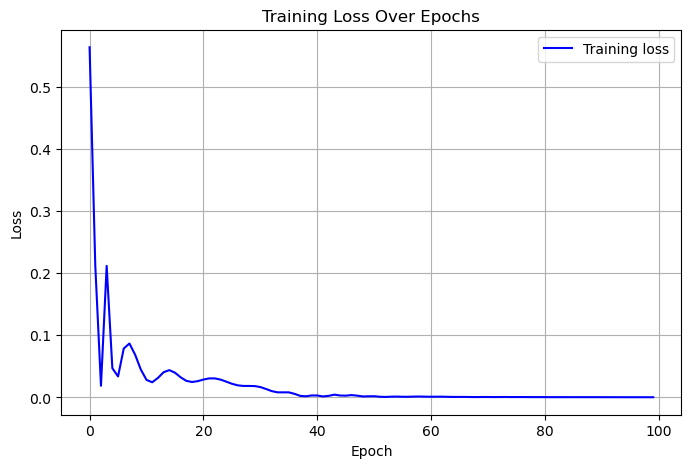

In [14]:
# Example usage of the data_loader function
x_train, y_train, x_test, y_test = data_loader(scaled_data_min_max, look_back, percentage_train_split=train_val_split)
model1 = train_model(x_train, y_train, input_dim, hidden_dim, num_layers, output_dim, learning_rate, num_epochs)

### Prediction

In [15]:
# Define a function to unscale predictions
def unscale_predictions(y_label, scaler, index):
    y_label_np = y_label.detach().numpy().reshape(-1)
    dummy_pred_array = np.zeros([y_label.shape[0], 5])
    dummy_pred_array[:, index] = y_label_np
    y_pred = scaler.inverse_transform(dummy_pred_array)
    return y_pred

# Define a function to plot predictions vs. actual values
def plot_predictions_vs_actual(predictions, actual, title):
    plt.figure(figsize=(15, 5))
    plt.plot(predictions, color='red', label='Predicted Closing')
    plt.plot(actual, color='blue', label='Actual Closing')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

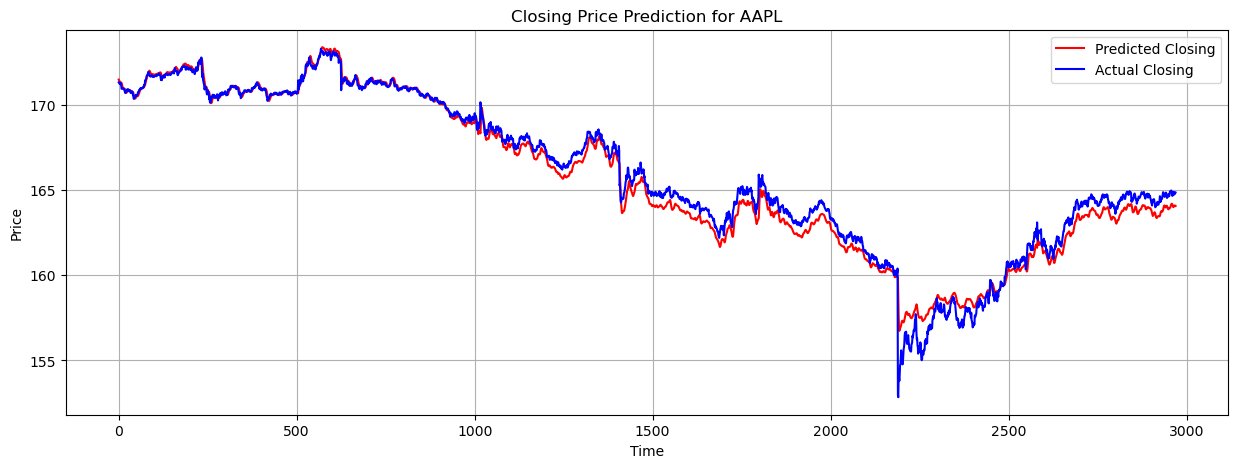

Test Score: 0.40 RMSE


In [16]:
# Calculate the unscaled predictions
y_test_pred = model1(x_test)
close_pred = unscale_predictions(y_test_pred, scaler_min_max, 3)[:, 3]
close_actual = unscale_predictions(y_test, scaler_min_max, 3)[:, 3]

# Plot the predictions vs. actual values
plot_title = 'Closing Price Prediction for AAPL'
plot_predictions_vs_actual(close_pred, close_actual, plot_title)

# Calculate root mean squared error 
testScore = np.mean(np.square(close_pred - close_actual))
print('Test Score: %.2f RMSE' % (testScore))

## Inference
1. The model seems to do well on Timestamps very close to where training started. 
2. Model is not able to handle sudden jumps or dips very well. It is able to handle jums when look_bak is high (like 15) i.e. to    predict next minute's closing we are lookin at last 14 Timestamps.
3. The model diverges vey fast when look_back value is low, where as reamins pretty consistent when value is set high
4. If look_back value is set high then it captures the trend very well but shifts the prediction graph towards right i.e. makes    delayed predictions which again makes the RMSE high

## Question 3, 7 & 8
Here, I'm attempting to simulate intraday trading, where I make a decision every minute, choosing to buy, hold, or sell. This simulation is conducted for a single day, but it can be adjusted to explore various other simulations, lasting up to one week. To keep things straightforward, I'm focusing on a single stock for buying and selling.

My trading strategy revolves around purchasing when the price is low and selling when it's high. Essentially, I observe the current closing price at time 't0' and attempt to predict the closing price at 't0+1' to base my decision on this prediction. The first plot illustrates the simulation using predicted values, while the second plot demonstrates what would occur if decisions were based on these predictions. Consequently, I aim to calculate the Return on Investment (ROI) and profit using actual values.
    

In [17]:
# Function to implement the trading strategy
def implement_strategy(data_frame, date, close_pred):
    # Adding a column 'close_pred' in the same data_frame
    data_frame['close_pred'] = np.nan    
    data_frame.loc[data_frame.shape[0] - close_pred.shape[0]:, 'close_pred'] = close_pred

    # Extract data points for the given date
    selected_data = data_frame[data_frame['index'].dt.date == date]

    # Determine whether to buy, sell, or hold based on prediction
    # Buy if predicted price is higher than the current price, sell if lower, hold otherwise
    action = 'x'
    profit_actual = 0  # Initialization of actual profit calculation
    prev_price = 0
    first_investment = 0

    profit_pred = 0  # Initialization of predicted profit calculation
    first_investment_pred = 0

    buy_signals = np.nan * np.zeros(selected_data.shape[0])  # Initialization for plotting graph
    sell_signals = np.nan * np.zeros(selected_data.shape[0])
    buy_signals_actual = np.nan * np.zeros(selected_data.shape[0])
    sell_signals_actual = np.nan * np.zeros(selected_data.shape[0])

    selected_data = selected_data.reset_index()

    for i in range(2, selected_data.shape[0]):
        current_price = selected_data.loc[i - 1, 'close_pred']
        predicted_closing = selected_data.loc[i, 'close_pred']

        # Buy in dips if the predicted closing is higher than the current price
        if (predicted_closing > current_price and selected_data.loc[i - 2, 'close_pred'] > current_price):
            action = 'Buy'
            buy_signals[i] = current_price  # Updating signals which will be used to plot graph
            buy_signals_actual[i] = selected_data.loc[i, 'Close']  # Updating signals which will be used to plot graph

            prev_price = selected_data.loc[i, 'Close']  # Updating previous price for profit calculation

            if first_investment == 0:
                first_investment = selected_data.loc[i, 'Close']
                first_investment_pred = selected_data.loc[i, 'close_pred']
        # Sell on highs if the predicted closing is lower than the current price
        elif (predicted_closing < current_price and current_price > selected_data.loc[i - 2, 'close_pred'] and action != 'x'):
            action = 'Sell'
            sell_signals[i] = current_price  # Updating signals which will be used to plot graph
            sell_signals_actual[i] = selected_data.loc[i, 'Close']  # Updating signals which will be used to plot graph
            profit_actual = profit_actual + selected_data.loc[i, 'Close'] - prev_price
            profit_pred = profit_pred + selected_data.loc[i, 'close_pred'] - prev_price

        # Hold in all other cases
        else:
            action = 'Hold'

    roi = profit_actual * 100 / first_investment  # ROI formula

    # Plotting actual closing price, predicted closing price, and buy/sell signals
    plt.figure(figsize=(12, 5))
    plt.plot(np.array(selected_data.index), np.array(selected_data['Close']), label='Actual Close',)
    plt.plot(np.array(selected_data.index), np.array(selected_data['close_pred']), label='Predicted Close', linestyle='--')
    plt.scatter(np.array(selected_data.index), buy_signals, marker='^', color='green', label='Buy Signal', s=20)
    plt.scatter(np.array(selected_data.index), sell_signals, marker='v', color='red', label='Sell Signal', s=20)
    plt.xlabel('Timestamp')
    plt.ylabel('Closing Price')
    plt.title('Trading Simulation on predicted closing price')
    plt.legend()
    plt.show()
    
    # Printing predicted final returns 
    print(f"Initial Balance Predicted: ${first_investment_pred:.2f}")
    print(f"Final Balance Predicted: ${profit_pred + first_investment_pred:.2f}")
    print(f"Final Profit Predicted: ${profit_pred:.2f}")
    print(f"Returns Predicted: {profit_pred * 100 / first_investment_pred:.2f}%")
    print()
    
    # Plotting actual closing price, predicted closing price, and buy/sell signals    
    plt.figure(figsize=(12, 5))
    plt.plot(np.array(selected_data.index), np.array(selected_data['Close']), label='Actual Close',)
    plt.scatter(np.array(selected_data.index), np.array(buy_signals_actual), marker='^', color='green', label='Buy Signal', s=20)
    plt.scatter(np.array(selected_data.index), sell_signals_actual, marker='v', color='red', label='Sell Signal', s=20)
    plt.xlabel('Timestamp')
    plt.ylabel('Closing Price')
    plt.title('Trading Simulation on actual closing price when orders are made based on predicted price')
    plt.legend()
    plt.show()
    
    # Print actual final returns
    print(f"Initial Balance: ${first_investment:.2f}")
    print(f"Final Balance: ${profit_actual + first_investment:.2f}")
    print(f"Final Profit: ${profit_actual:.2f}")
    print(f"Returns: {roi:.2f}%")
    print()


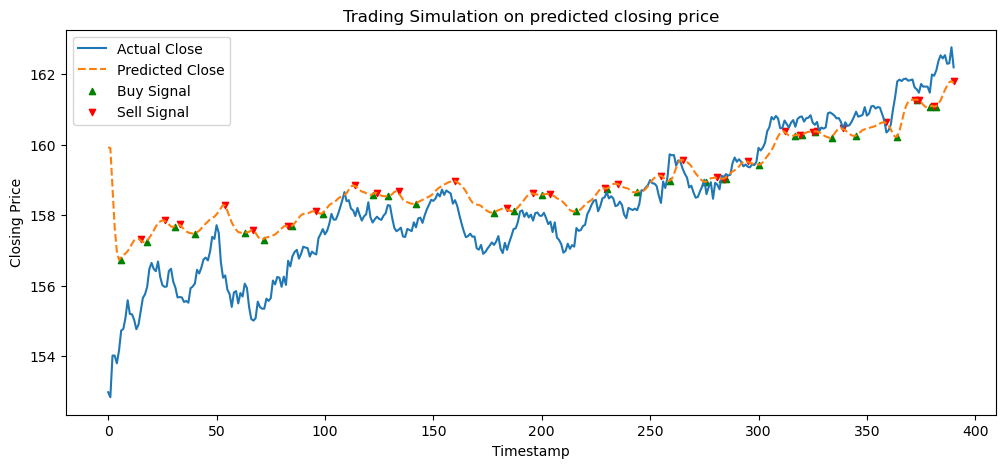

Initial Balance Predicted: $156.82
Final Balance Predicted: $176.82
Final Profit Predicted: $20.01
Returns Predicted: 12.76%



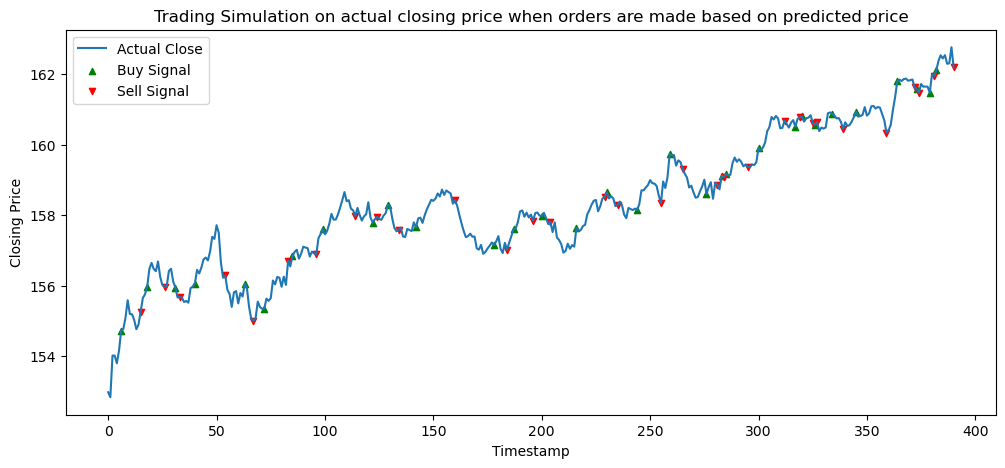

Initial Balance: $154.73
Final Balance: $157.12
Final Profit: $2.39
Returns: 1.54%



In [18]:
data_frame = aapl_hf
date = data_frame['index'].max().date() - pd.Timedelta(days=1)   # change days to see different day's simulation from 0 to 6
implement_strategy(data_frame, date, close_pred)

### Inferences:
1. Utilizing LSTM for direct stock trading is not feasible.
2. The observed shift in the graph indicates that trading actions, which appear successful when based on predicted values, may not perform as effectively when applied to actual data.
3. The second graph essentially represents a projection of all actions taken using predicted values onto the actual data.
4. Long-term strategies typically entail reduced risk but may also yield lower returns when compared to high-frequency trading strategies.

### Intraday Trading:
1. Intraday trading is associated with elevated risk due to its reliance on short timeframes and market volatility.
2. It heavily relies on technical analysis and short-term indicators.
3. Intraday trading is subject to higher tax rates on short-term gains.

### Long-Term Trading (Monthly):
1. Long-term trading, on a monthly basis, involves a lower risk tolerance and provides insulation from short-term market fluctuations.
2. It predominantly relies on fundamental analysis and market fundamentals.
3. Long-term trading requires comparatively less capital and demands less active monitoring.
4. This strategy benefits from the lower tax rates applied to long-term gains.

## Bonus Question
### Incorporating Multiple Stocks
I am exploring the possibility of improving the model's predictions by providing input data consisting of the Open and Close values of AAPL and AMZN stocks. This approach aims to determine whether the model's performance can surpass that of the previous model. I have specifically selected Open and Close values to streamline the input data and reduce training time for the LSTM model.

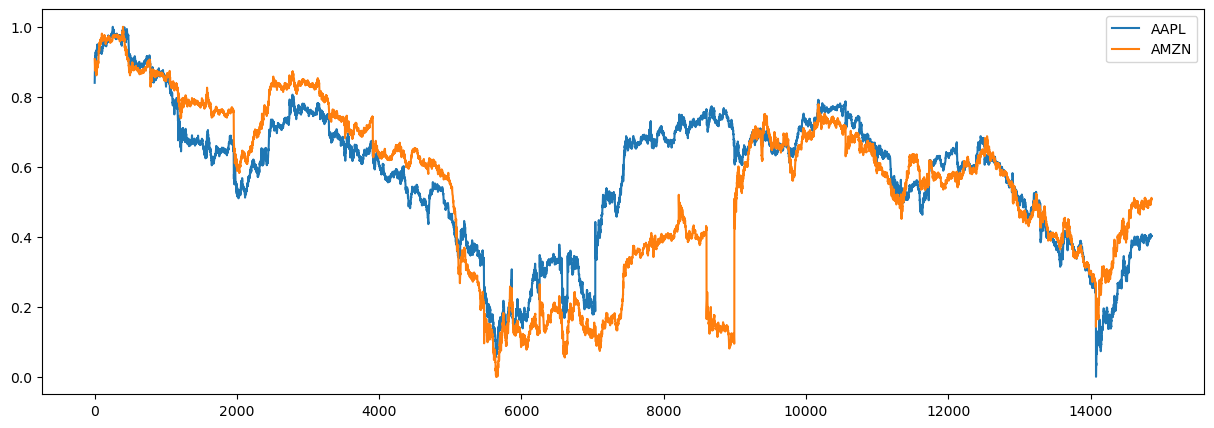

In [19]:
# Remove the 'index' column from the 'amzn_hf' DataFrame without modifying the original DataFrame
amzn_hf1 = amzn_hf.drop('index', axis=1, inplace=False)

# Initialize a Min-Max scaler object with a feature range between 0 and 1
scaler_min_max = MinMaxScaler(feature_range=(0, 1))

# Scale the data in 'amzn_hf1' using the Min-Max scaler
amzn_scaled_data = scaler_min_max.fit_transform(amzn_hf1)

# Create a new DataFrame from the scaled data
amzn_scaled_data = pd.DataFrame(amzn_scaled_data)

# Scale the data in 'aapl_hf1' using the same Min-Max scaler from a previous section
aapl_scaled_data = pd.DataFrame(scaler_min_max.fit_transform(aapl_hf1))

# Plotting AAPL and AMZN stocks to see their correlation
plt.figure(figsize=(15,5))   # Create a new plot with a specified figure size
plt.plot(aapl_scaled_data[3], label='AAPL')  # Plot AAPL stock data with a label
plt.plot(amzn_scaled_data[3], label='AMZN')  # Plot AMZN stock data with a label
plt.legend()  # Display a legend for the plot
plt.show()  # Show the plot

It is clear that AAPL and AMZN are very closely related from the above figure

In [20]:
# Hyperparameter initialization
input_dim = 4   # Number of features (e.g., open and close prices of two stocks)
hidden_dim = 20  # Number of units in each hidden layer
num_layers = 2   # Number of LSTM layers in the model
output_dim = 1   # Number of output units (e.g., predicting a single value)
batch_size = 64  # Batch size for training
learning_rate = 0.03  # Learning rate for optimization
num_epochs = 100 # Set the number of training epochs
look_back = 5  # Number of time steps to look back in the input sequence
percentage_train_split = 0.8  # Percentage of data to use for training (80% in this case)

Epoch 10 MSE: 0.02579483948647976
Epoch 20 MSE: 0.012070972472429276
Epoch 30 MSE: 0.005539903417229652
Epoch 40 MSE: 0.002726952312514186
Epoch 50 MSE: 0.0006378075340762734
Epoch 60 MSE: 0.00044768236693926156
Epoch 70 MSE: 0.00029028282733634114
Epoch 80 MSE: 0.00022448250092566013
Epoch 90 MSE: 0.00016796372074168175
Epoch 100 MSE: 0.00013073411537334323


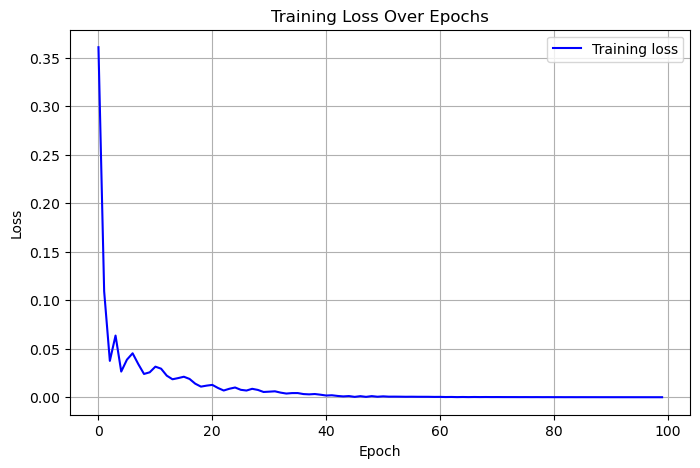

In [21]:
# using previousle made data loader to split the data
amzn_x_train, amzn_y_train, amzn_x_test, amzn_y_test = data_loader(amzn_scaled_data, look_back, percentage_train_split)
aapl_x_train, aapl_y_train, aapl_x_test, aapl_y_test = data_loader(aapl_scaled_data, look_back, percentage_train_split)

# Concatenate the 'close' and 'open' columns of 'amzn_x_test' and 'aapl_x_test' tensors along the third dimension.
concat_x_test = torch.cat((amzn_x_test[:, :, [0, 3]], aapl_x_test[:, :, [0, 3]]), dim=2)
# Concatenate the 'close' and 'open' columns of 'amzn_x_train' and 'aapl_x_train' tensors along the third dimension.
concat_x_train = torch.cat((amzn_x_train[:, :, [0, 3]], aapl_x_train[:, :, [0, 3]]), dim=2)

model2 = train_model(concat_x_train, aapl_y_train, input_dim, hidden_dim, num_layers, output_dim, learning_rate, num_epochs)

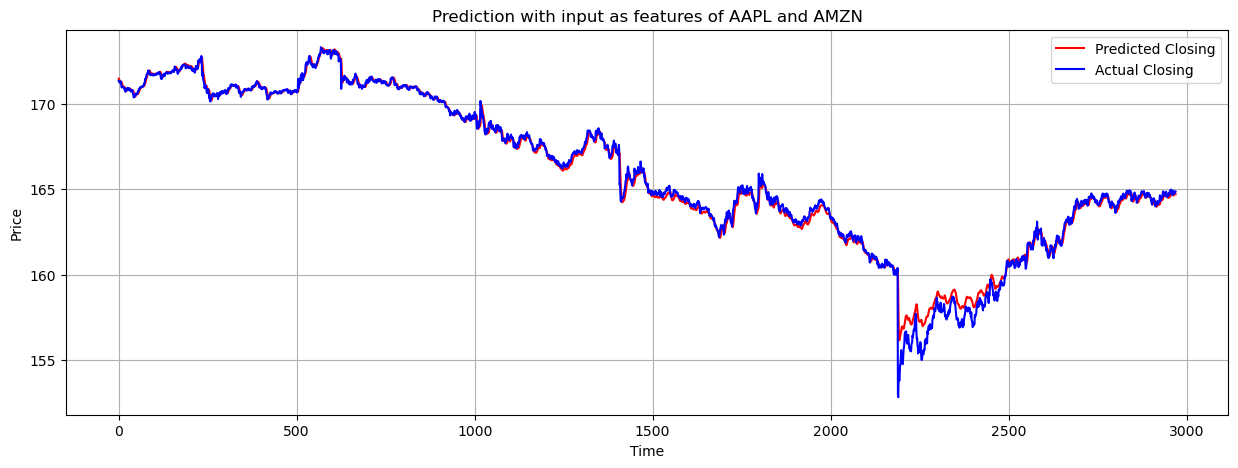

Test Score: 0.18 RMSE


In [22]:
# Making predictions using the model on the concatenated test data
aapl_y_test_pred = model2(concat_x_test)

# Inverse scaling the predicted values to get the actual closing prices
close_pred_aapl = unscale_predictions(aapl_y_test_pred, scaler_min_max, 3)[:, 3]

# Inverse scaling the actual closing prices from the test data
close_actual_aapl = unscale_predictions(aapl_y_test, scaler_min_max, 3)[:, 3]

# Creating a plot to visualize the predicted and actual closing prices
plot_title = 'Prediction with input as features of AAPL and AMZN'
plot_predictions_vs_actual(close_pred_aapl, close_actual_aapl, plot_title)

# Calculating the root mean squared error (RMSE) to evaluate the model's performance
testScore = np.mean(np.square(close_pred_aapl - close_actual_aapl))
print('Test Score: %.2f RMSE' % (testScore))

#### Inferences
1. Incorporating multiple stocks into the model seems to boost its performance.
2. This enhancement can be attributed to the model's ability to encompass a broader market context, as opposed to solely concentrating on an individual stock. As a result, it partially captures overall market trends.
3. This impact is particularly noticeable when the two integrated stocks demonstrate a significant correlation. For example, a stock from an agriculture company and one from an IT company may not exhibit substantial correlation over a brief period of a few weeks.

### Incorporating time with multiple stocks

In [23]:
# Create a time tensor of shape (look_back-1, 1)
time = np.arange(1, look_back).reshape(-1, 1)
time = torch.tensor(time)

# Expand the time tensor to match the shape of concat_x_test
expanded_time1 = time.expand(concat_x_test.shape[0], -1, 1)

# Expand the time tensor to match the shape of concat_x_train
expanded_time2 = time.expand(concat_x_train.shape[0], -1, 1)

# Concatenate along the third dimension (dim=2) to add the time dimension to x_test
concat_x_test_with_time = torch.cat((concat_x_test, expanded_time1), dim=2)

# Concatenate along the third dimension (dim=2) to add the time dimension to x_train
concat_x_train_with_time = torch.cat((concat_x_train, expanded_time2), dim=2)

In [24]:
# Hyperparameter initialization
input_dim = 5   # Number of features (e.g., open and close prices of two stocks)
hidden_dim = 20  # Number of units in each hidden layer
num_layers = 2   # Number of LSTM layers in the model
output_dim = 1   # Number of output units (e.g., predicting a single value)
batch_size = 64  # Batch size for training
learning_rate = 0.03  # Learning rate for optimization
num_epochs = 100 # Set the number of training epochs
look_back = 5  # Number of time steps to look back in the input sequence
percentage_train_split = 0.8  # Percentage of data to use for training (80% in this case)

Epoch 10 MSE: 0.058975137770175934
Epoch 20 MSE: 0.03540034592151642
Epoch 30 MSE: 0.03346572071313858
Epoch 40 MSE: 0.025148065760731697
Epoch 50 MSE: 0.011709111742675304
Epoch 60 MSE: 0.006091118324548006
Epoch 70 MSE: 0.0021520827431231737
Epoch 80 MSE: 0.0003415996616240591
Epoch 90 MSE: 0.0003600564377848059
Epoch 100 MSE: 0.00015499164874199778


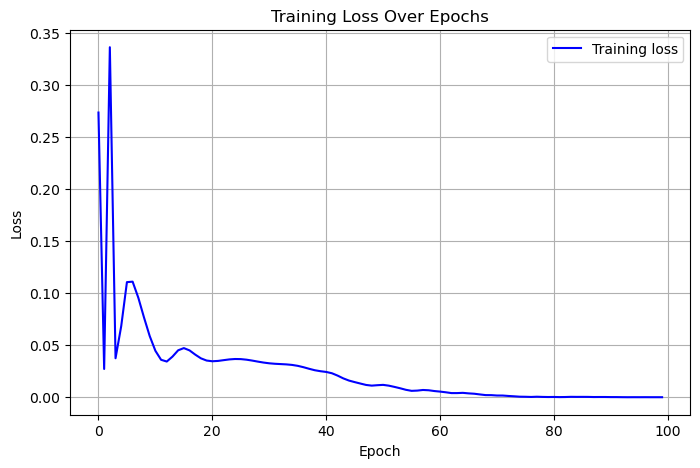

In [25]:
model3 = train_model(concat_x_train_with_time, aapl_y_train, input_dim, hidden_dim, num_layers, output_dim, learning_rate, num_epochs)

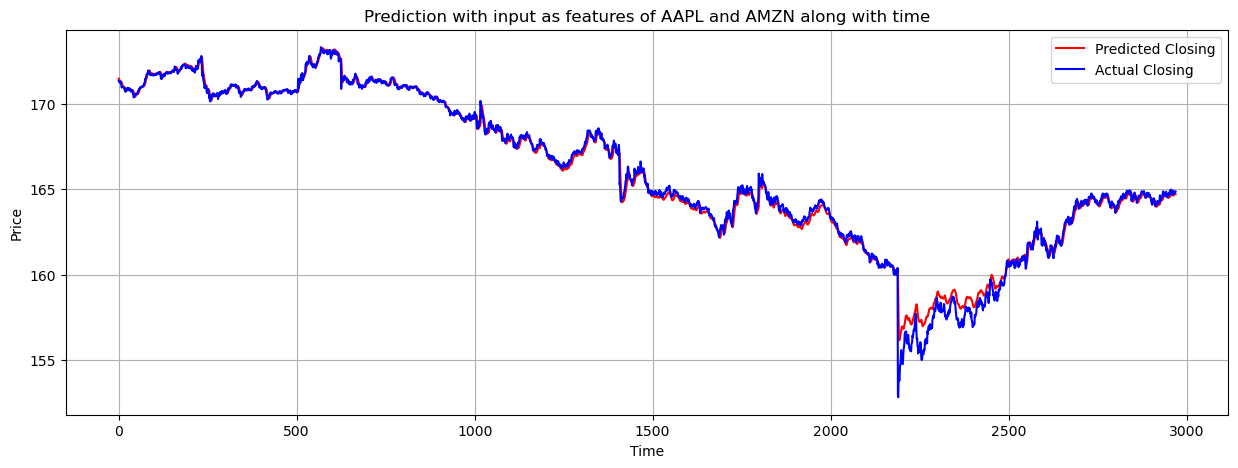

Test Score: 0.13 RMSE


In [26]:
# Making predictions using the model on the concatenated test data with time features
aapl_y_test_pred_with_time = model3(concat_x_test_with_time)

# Inverse scaling the predicted values to get the actual closing prices
close_pred_aapl_time = unscale_predictions(aapl_y_test_pred_with_time, scaler_min_max, 3)[:, 3]

# Inverse scaling the actual closing prices from the test data
close_actual_aapl_time = unscale_predictions(aapl_y_test, scaler_min_max, 3)[:, 3]

# Creating a plot to visualize the predicted and actual closing prices
plot_title = 'Prediction with input as features of AAPL and AMZN along with time'
plot_predictions_vs_actual(close_pred_aapl, close_actual_aapl, plot_title)

# Calculating the root mean squared error (RMSE) to evaluate the model's performance
testScore = np.mean(np.square(close_pred_aapl_time - close_actual_aapl_time))
print('Test Score: %.2f RMSE' % (testScore))

## Results
1. Including time as an input variable results in further enhancements in performance, especially when dealing with data points that are distant from the training set.
2. The model has shown significant proficiency in addressing downturns in the data, displaying improved efficiency in this aspect.

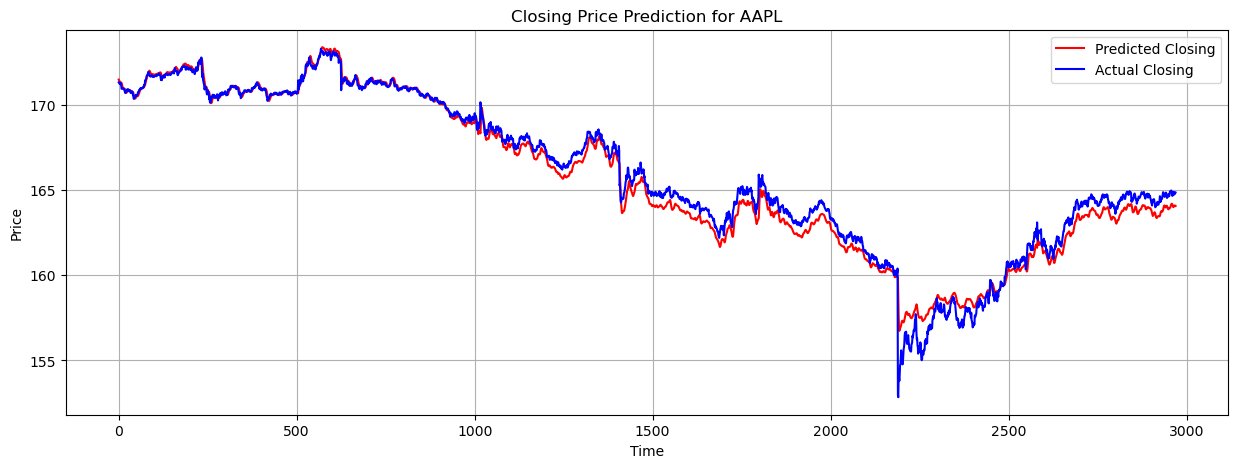

Test Score for AAPL: 0.40 RMSE


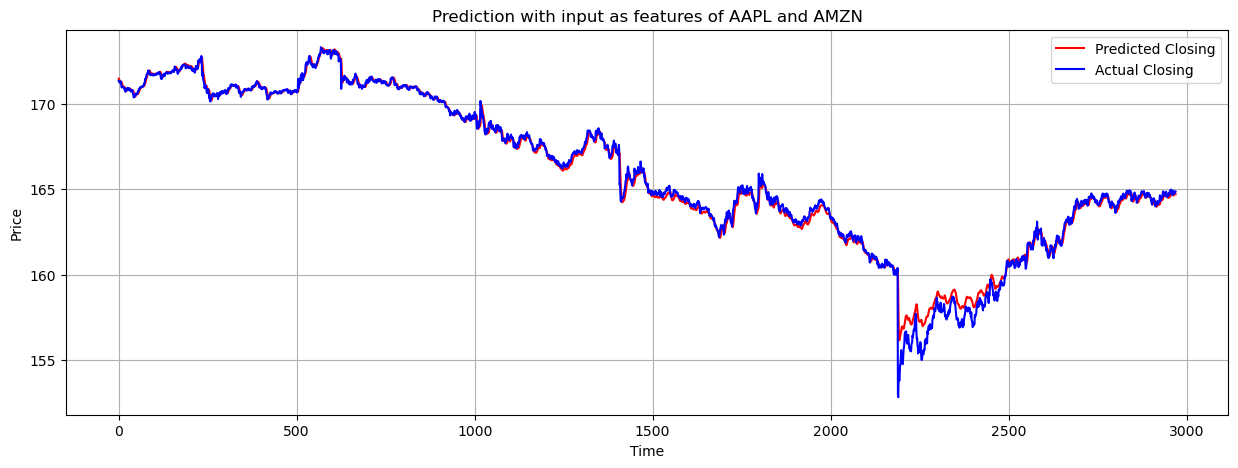

Test Score for AAPL and AMZN: 0.18 RMSE


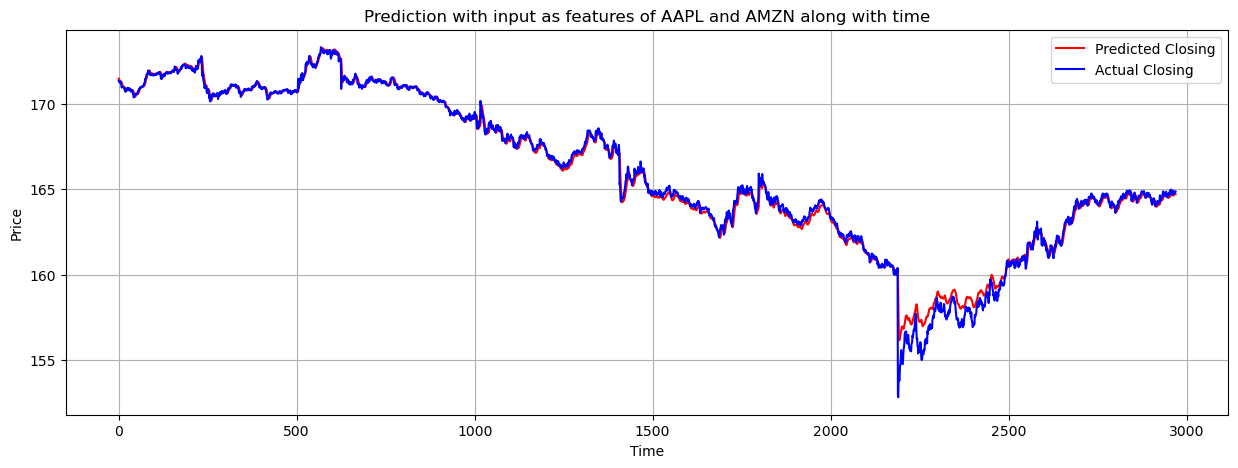

Test Score for AAPL and AMZN with time: 0.13 RMSE


In [27]:
# Plot the predictions vs. actual values for AAPL
plot_title = 'Closing Price Prediction for AAPL'
plot_predictions_vs_actual(close_pred, close_actual, plot_title)

# Calculate root mean squared error for AAPL predictions
testScore = np.mean(np.square(close_pred - close_actual))
print('Test Score for AAPL: %.2f RMSE' % (testScore))

# Creating a plot to visualize the predicted and actual closing prices for AAPL
plot_title = 'Prediction with input as features of AAPL and AMZN'
plot_predictions_vs_actual(close_pred_aapl, close_actual_aapl, plot_title)

# Calculating the root mean squared error (RMSE) for AAPL and AMZN predictions
testScore = np.mean(np.square(close_pred_aapl - close_actual_aapl))
print('Test Score for AAPL and AMZN: %.2f RMSE' % (testScore))

# Creating a plot to visualize the predicted and actual closing prices for AAPL and AMZN with time
plot_title = 'Prediction with input as features of AAPL and AMZN along with time'
plot_predictions_vs_actual(close_pred_aapl, close_actual_aapl, plot_title)

# Calculating the root mean squared error (RMSE) for AAPL and AMZN predictions with time
testScore = np.mean(np.square(close_pred_aapl_time - close_actual_aapl_time))
print('Test Score for AAPL and AMZN with time: %.2f RMSE' % (testScore))

### Links to Starter Code Resources
1. [Kaggle - Stock Market Analysis & Prediction using LSTM](https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm)
2. [Kaggle - LSTM Stock Price Prediction by PyTorch](https://www.kaggle.com/code/arezalo/lstm-stock-price-prediction-by-pytorch)
3. [PyTorch Tutorials](https://pytorch.org/tutorials/)
4. [Medium - Stock Price Prediction with PyTorch](https://medium.com/swlh/stock-price-prediction-with-pytorch-37f52ae84632)
5. [YouTube - Video Tutorial on Stock Price Prediction](https://www.youtube.com/watch?v=q_HS4s1L8UI)
7. [DataCamp Tutorial - LSTM in Python for Stock Market Analysis](https://www.datacamp.com/tutorial/lstm-python-stock-market)
6. [ChatGPT](https://chat.openai.com/)